# 08-13-2020 ::ML - Demo Project by CHANDRA

# Version 3

# Median House Value Projection for California House 

- Machine Learning Project
- Data Source :: Housing information for Californian Housing Districts 
- Task is to predict the median values 



# Setup

- Import a few common modules, 
- Ensure MatplotLib plots figures inline 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd

# to make this notebook's output stable across runs
rnd.seed(43)

# Prep for the plotting capability
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



# Get the data

In [2]:
import pandas as pd
housing = pd.read_csv('CA_housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

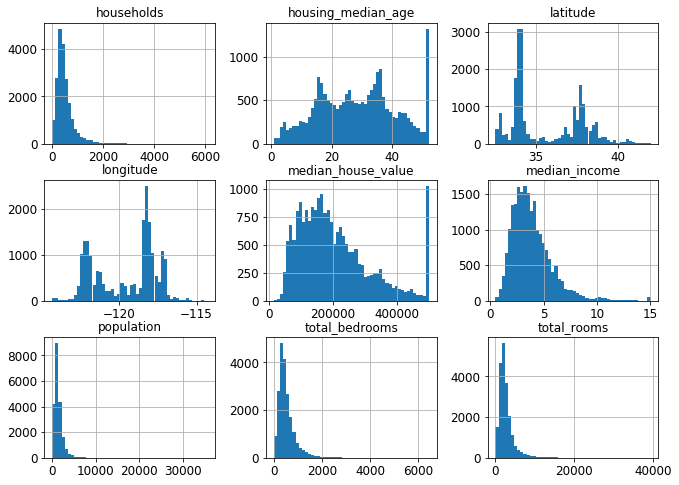

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(11,8))
plt.show()

In [7]:
import numpy as np
import numpy.random as rnd
rnd.seed(43) # to make this notebook's output identical at every run

def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [9]:
# Visualize the data and analyze
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=43)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7310,-118.19,33.99,36.0,1273.0,379.0,1398.0,353.0,2.4516,147800.0,<1H OCEAN
4402,-118.28,34.09,49.0,3828.0,1197.0,2862.0,1009.0,2.4677,219200.0,<1H OCEAN
1929,-121.07,38.66,22.0,1831.0,274.0,813.0,269.0,4.6394,173400.0,INLAND
11551,-117.98,33.75,37.0,1264.0,274.0,783.0,273.0,3.3438,199600.0,<1H OCEAN
9882,-121.79,36.68,22.0,6912.0,1513.0,3794.0,1455.0,3.0608,168300.0,<1H OCEAN


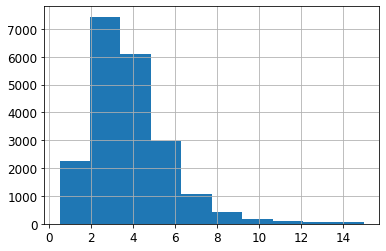

In [12]:
housing["median_income"].hist()

In [13]:
housing["income_tier"] = np.ceil(housing["median_income"] / 1.5)
housing["income_tier"].where(housing["income_tier"] < 5, 5.0, inplace=True)
housing["income_tier"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_tier, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(housing, housing["income_tier"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
def income_tier_distribution(data):
    return data["income_tier"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_distributions = pd.DataFrame({
    "Overall": income_tier_distribution(housing),
    "Random": income_tier_distribution(test_set),
    "Stratified": income_tier_distribution(strat_test_set)
 }).sort_index()
compare_distributions["Rand. %error"] = 100 * compare_distributions["Random"] / compare_distributions["Overall"] - 100
compare_distributions["Strat. %error"] = 100 * compare_distributions["Stratified"] / compare_distributions["Overall"] - 100

In [17]:
compare_distributions

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [18]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_tier", axis=1, inplace=True)

# Visualize the data and analyze

In [19]:
housing = strat_train_set.copy()   # housing data as stratified by the income group

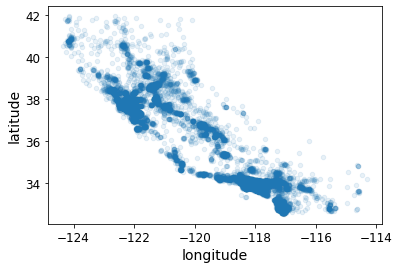

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

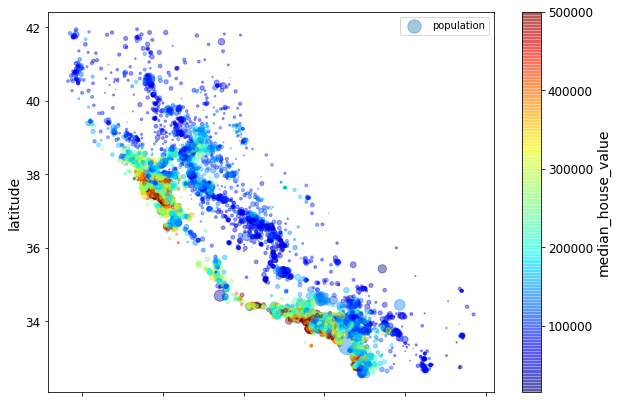

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690551
total_rooms           0.135290
housing_median_age    0.107099
households            0.066341
total_bedrooms        0.050002
population           -0.024069
longitude            -0.040318
latitude             -0.148121
Name: median_house_value, dtype: float64

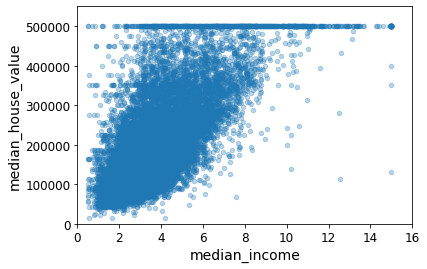

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.3)
plt.axis([0, 16, 0, 550000])

plt.show()

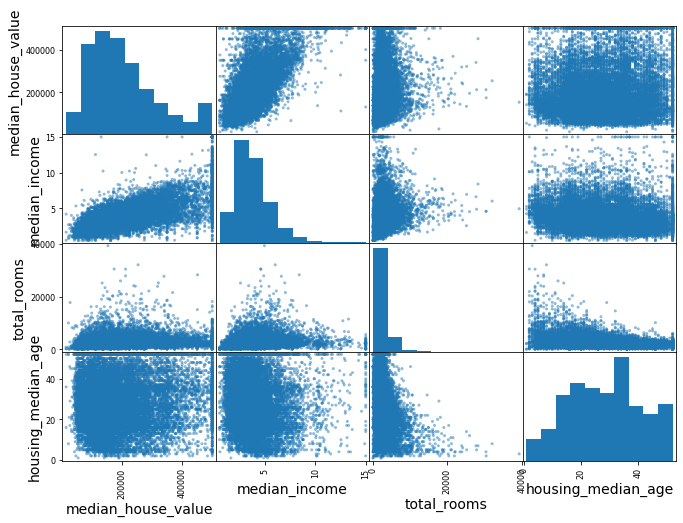

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(11, 8))
plt.show()

#  Combining some attributes
 - In the Charts shown above, only the 'median_income' attirbute has a pronounced effect on the target attribute 'median_house_value'
 - We can try inserting three newly derived attributes, and compute the corr() again

In [25]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["population"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690551
rooms_per_household         0.216899
total_rooms                 0.135290
housing_median_age          0.107099
households                  0.066341
total_bedrooms              0.050002
population_per_household   -0.022871
population                 -0.024069
longitude                  -0.040318
latitude                   -0.148121
bedrooms_per_room          -0.257121
Name: median_house_value, dtype: float64

#  As per the data above, the new attribute 'bedrooms_per_room' has a significant impact.
- Lower this ratio, higher the price !!!


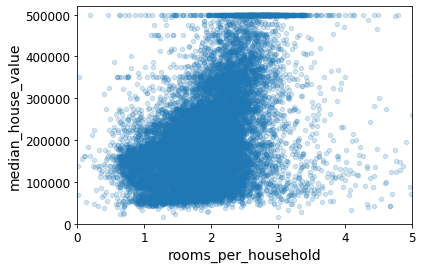

In [27]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16355.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16355.000000,16512.000000
mean,-119.566562,35.627334,28.574673,2636.435441,538.548028,1425.384811,499.568132,3.867989,206975.990552,1.977933,0.213104,3.085380
std,2.002846,2.135798,12.571246,2161.070450,420.334368,1118.259608,380.328008,1.895637,115161.546625,1.137204,0.058481,11.454579
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.002547,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1453.000000,297.000000,790.750000,280.000000,2.562500,120100.000000,1.522238,0.175424,2.431483
50%,-118.490000,34.250000,29.000000,2131.000000,436.000000,1166.000000,410.000000,3.533400,180400.000000,1.937968,0.203085,2.820659
75%,-118.010000,37.710000,37.000000,3146.250000,647.000000,1726.000000,604.000000,4.739375,264750.000000,2.296248,0.239804,3.282103
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,55.222222,1.000000,1243.333333


# Prepare the data for ML algorithms
- Rivert back to the training data set


In [53]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()  # will be target output later

#  Cleanup the data; fill the missing values
-  Use Imputer to take care of the missing data
- Imputer can handle only Numeric attributes, so drop categorical attribute


In [54]:
from sklearn.impute import SimpleImputer

housing_num_only = housing.drop("ocean_proximity", axis=1)  # keep only numerical atttributes

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num_only)
X = imputer.transform(housing_num_only)
housing_tr = pd.DataFrame(X, columns=housing_num_only.columns)
housing_tr.iloc[20:25]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20,-120.08,36.96,36.0,2074.0,349.0,954.0,363.0,3.1136
21,-117.69,33.54,20.0,1767.0,280.0,801.0,284.0,6.5394
22,-120.95,36.47,52.0,1691.0,301.0,618.0,239.0,3.2292
23,-118.45,34.31,28.0,1532.0,287.0,977.0,275.0,4.4773
24,-117.74,34.06,4.0,1391.0,506.0,727.0,369.0,1.4722


In [55]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [56]:
housing_num_only.median().values

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [57]:
imputer.strategy

'median'

In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num_only.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.93,34.06,28.0,3342.0,688.0,2210.0,647.0,3.4596
1,-117.94,33.87,46.0,2066.0,450.0,1275.0,448.0,3.9375
2,-121.84,37.32,16.0,1866.0,364.0,1835.0,412.0,5.3363
3,-116.99,33.20,17.0,2980.0,539.0,1531.0,505.0,3.1553
4,-122.49,38.10,43.0,1226.0,244.0,491.0,205.0,4.9286


#  Location Attribute need to be added to the dataset
- Convert Categorical info into Numerical form
- Use Label Encoder to have numerical representation

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_loctype = housing["ocean_proximity"]
housing_loctype_encoded = encoder.fit_transform(housing_loctype)   # now, fully numeric one-dimensional array
print(encoder.classes_)
housing_loctype_encoded

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([0, 0, 0, ..., 3, 0, 0])

#  Location Attribute - Convert to binary encoding to disguise the space proximity
-  if we have 0 through 4 , for property location types, the nearness will be misinterpreted.
- So, use OneHotEncoder to do a binary transformation to extend equal weight.

In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_loctype_1hot = encoder.fit_transform(housing_loctype_encoded.reshape(-1,1))
housing_loctype_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_loctype_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [63]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit_transform(housing_loctype)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

# Custom transformations
-  BaseEstimator -> allows for getparams() and setparams()
-  TransformerMixin -->  extends custom fit_transform()
-  Write a custom function to add new attributes  ;use np.c_ to add additional attributes 
-  new attributes: rooms/househld,poln/houseld,bedrooms/room will be added.

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# Column Ids for existing attributes from the dataset to create new attributes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class AtrributeAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#instantiate and add new attributes
attr_adder = AtrributeAggregator(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-117.93,34.06,28,3342,688,2210,647,3.4596,<1H OCEAN,5.16538,3.41577
1,-117.94,33.87,46,2066,450,1275,448,3.9375,<1H OCEAN,4.61161,2.84598
2,-121.84,37.32,16,1866,364,1835,412,5.3363,<1H OCEAN,4.52913,4.45388
3,-116.99,33.2,17,2980,539,1531,505,3.1553,<1H OCEAN,5.90099,3.03168
4,-122.49,38.1,43,1226,244,491,205,4.9286,NEAR BAY,5.98049,2.39512


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AtrributeAggregator()),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline.fit_transform(housing_num_only)  # without location info

num_pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# CustomizedLabelBinarizer to allow for passing two parameters       
class SupervisionFriendlyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(SupervisionFriendlyLabelBinarizer, self).fit_transform(X)

    
num_attribs = list(housing_num_only)  # without location attribute
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AtrributeAggregator()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', SupervisionFriendlyLabelBinarizer()),
    ])

preparation_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


In [68]:
housing_prepared = preparation_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.81714319, -0.73386229, -0.04571467, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81215014, -0.82282471,  1.38616772, ...,  0.        ,
         0.        ,  0.        ],
       [-1.13513781,  0.7925456 , -1.00030293, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.42972752,  0.98451714,  1.86346185, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68732399, -0.74322676,  0.82932457, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5245954 ,  1.22799324, -0.68210685, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
housing_prepared.shape

(16512, 16)

In [70]:
print(list(housing_num_only))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


# Utility Functions for Regression Analysis

In [71]:
#  Common function to print the results from individual Regression Results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


# Algorithm -1 - Linear Regression

In [72]:
# Algorithm -1 - Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# let's try the full pipeline on a few training instances
trial_data = housing.iloc[:5]
trial_labels = housing_labels.iloc[:5]
trial_data_prepared = preparation_pipeline.transform(trial_data)

print("Labels:\t\t", list(trial_labels))
print("Predictions:\t", lin_reg.predict(trial_data_prepared))

Labels:		 [202800.0, 187000.0, 212800.0, 250000.0, 307000.0]
Predictions:	 [184970.64678445 239340.4344935  246683.7951888  165288.35480714
 284539.6402469 ]


In [75]:
#mean absolute error 
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49304.82773988994

In [76]:
#mean squared  error 
from sklearn.metrics import mean_squared_error


lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68116.54761715344

In [77]:
# rmse for lin-reg w/CV

from sklearn.model_selection import cross_val_score          # CV imported

lin_cv_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_cv_rmse_scores = np.sqrt(-lin_cv_scores)
display_scores(lin_cv_rmse_scores)

Scores: [64212.8939011  67341.68004298 67257.98725219 67736.45141673
 73751.84280646 68317.17225103 67370.24975243 66870.4054549
 68647.94962971 73056.49423986]
Mean: 68456.31267473861
Standard deviation: 2723.2007236067525


In [81]:
#brouhgt from p22
pd.Series(lin_cv_rmse_scores).describe()

count       10.000000
mean     68456.312675
std       2870.505604
min      64212.893901
25%      67278.910450
50%      67553.350585
75%      68565.255285
max      73751.842806
dtype: float64

# Algorithm 2 - Decision Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(housing_prepared, housing_labels)
housing_predictions = dt_reg.predict(housing_prepared)
dt_mse = mean_squared_error(housing_labels, housing_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

In [83]:
# rmse for dt-reg w/CV
dt_cv_scores = cross_val_score(dt_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
dt_cv_rmse_scores = np.sqrt(-dt_cv_scores)
display_scores(dt_cv_rmse_scores)

Scores: [67847.01824173 70604.7086905  70765.06948801 67905.33682823
 68284.53823699 68478.71263565 67091.71598282 71003.75929799
 72662.59568743 72823.54847851]
Mean: 69746.70035678579
Standard deviation: 1977.800693886116


# Algorithm 3 - Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, housing_labels)
housing_predictions = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, housing_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18577.96221100478

In [86]:
rf_cv_scores = cross_val_score(rf_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
display_scores(rf_cv_rmse_scores)

Scores: [48110.21494433 48911.51116562 49756.54728899 50645.3568203
 50709.77011141 48848.55555063 49361.25863131 49201.45681407
 49961.45972545 53414.62337126]
Mean: 49892.07544233758
Standard deviation: 1401.8477396982812


# Fine Tuning the model

# Parameter Tuning with GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
# create and fit a RandomForestRegression model
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64661.5157086507 {'max_features': 2, 'n_estimators': 3}
55290.9461268174 {'max_features': 2, 'n_estimators': 10}
52310.89425700761 {'max_features': 2, 'n_estimators': 30}
60218.94734989399 {'max_features': 4, 'n_estimators': 3}
52354.965220845086 {'max_features': 4, 'n_estimators': 10}
50226.599295830325 {'max_features': 4, 'n_estimators': 30}
58462.07915414299 {'max_features': 6, 'n_estimators': 3}
52368.110784845376 {'max_features': 6, 'n_estimators': 10}
49961.778690640574 {'max_features': 6, 'n_estimators': 30}
59247.248790793456 {'max_features': 8, 'n_estimators': 3}
52219.62441115023 {'max_features': 8, 'n_estimators': 10}
49995.2524471542 {'max_features': 8, 'n_estimators': 30}
62324.05168269966 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54078.38935527159 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59512.50094486961 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52250.909467306825 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [91]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.316772,0.072185,0.015200,0.004579,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.967460e+09,-4.342796e+09,-4.237229e+09,-4.148200e+09,-4.209873e+09,-4.181112e+09,1.239747e+08,18
1,0.905153,0.023856,0.032418,0.002725,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.882112e+09,-3.132050e+09,-3.083641e+09,-2.929436e+09,-3.258204e+09,-3.057089e+09,1.368819e+08,11
2,3.010614,0.202169,0.095995,0.010937,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.629316e+09,-2.710180e+09,-2.758775e+09,-2.638956e+09,-2.944923e+09,-2.736430e+09,1.145708e+08,7
3,0.407776,0.021662,0.012999,0.001265,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.374027e+09,-3.881817e+09,-3.719064e+09,-3.618039e+09,-3.538660e+09,-3.626322e+09,1.704609e+08,16
4,1.295912,0.037095,0.031609,0.002795,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.561902e+09,-2.668600e+09,-2.883662e+09,-2.630287e+09,-2.960761e+09,-2.741042e+09,1.537676e+08,8
5,4.378339,0.084203,0.100589,0.015982,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.358992e+09,-2.544703e+09,-2.516648e+09,-2.423675e+09,-2.769539e+09,-2.522711e+09,1.400405e+08,3
6,0.565966,0.006418,0.011611,0.001026,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.531852e+09,-3.313702e+09,-3.310426e+09,-3.367724e+09,-3.565369e+09,-3.417815e+09,1.092315e+08,13
7,2.072071,0.139949,0.034198,0.002559,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.601879e+09,-2.762087e+09,-2.733184e+09,-2.606862e+09,-3.008083e+09,-2.742419e+09,1.477678e+08,9
8,6.059239,0.564323,0.101982,0.013622,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.377585e+09,-2.507892e+09,-2.432245e+09,-2.421697e+09,-2.741477e+09,-2.496179e+09,1.296208e+08,1
9,0.837149,0.074705,0.011800,0.000980,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.221017e+09,-3.785470e+09,-3.417983e+09,-3.497134e+09,-3.629578e+09,-3.510236e+09,1.909586e+08,14


# Parameter Tuning with RandomizedSearchCV

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
#create and RandomForestRegression model and fit on with RandomizedSearchCV
rf_model = RandomForestRegressor()
rnd_search = RandomizedSearchCV(rf_model, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [93]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48930.834376276 {'max_features': 5, 'n_estimators': 138}
48812.20740072589 {'max_features': 6, 'n_estimators': 144}
58552.03997356052 {'max_features': 1, 'n_estimators': 10}
49115.2072651855 {'max_features': 7, 'n_estimators': 74}
50099.35497464484 {'max_features': 3, 'n_estimators': 115}
54188.5692321845 {'max_features': 1, 'n_estimators': 126}
49473.4997018882 {'max_features': 4, 'n_estimators': 62}
51488.91650103511 {'max_features': 2, 'n_estimators': 159}
49603.946933423926 {'max_features': 5, 'n_estimators': 50}
49951.0634814372 {'max_features': 7, 'n_estimators': 24}


In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.00526408e-02, 6.56985539e-02, 4.34139466e-02, 1.63394041e-02,
       1.61927124e-02, 1.68181345e-02, 1.50343102e-02, 3.56579045e-01,
       5.47394211e-02, 1.08257613e-01, 6.67645552e-02, 7.75274174e-03,
       1.55770361e-01, 1.18035970e-04, 2.77190900e-03, 3.69661566e-03])

In [95]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3565790448900482, 'median_income'),
 (0.15577036054084148, 'INLAND'),
 (0.1082576133098598, 'population_per_household'),
 (0.07005264081325978, 'longitude'),
 (0.06676455523432372, 'bedrooms_per_room'),
 (0.06569855391125691, 'latitude'),
 (0.054739421082213434, 'rooms_per_household'),
 (0.04341394658257094, 'housing_median_age'),
 (0.0168181344933764, 'population'),
 (0.016339404149063576, 'total_rooms'),
 (0.016192712437257926, 'total_bedrooms'),
 (0.015034310185633023, 'households'),
 (0.0077527417419415295, '<1H OCEAN'),
 (0.003696615663469512, 'NEAR OCEAN'),
 (0.0027719089953186717, 'NEAR BAY'),
 (0.00011803596956509557, 'ISLAND')]

# Run  on the finalized  Model with the Test Dataset

In [96]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_transformed)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49924.12006653739

# Final Summary

1. Reviewed Data Structure of the given dataset

2. Analyze futher with visual info - Deduce what kind of distribution the data has.

3. Identified the dominating attributes with the help of corr matrix.

4. General Inferences:
   - 20640 instances, each row representing an housing district
   -   207 districts are missing 'total-bed_rooms'  feature
      
   - Histograms are 'tail heavy' indicating pattern detection a bit harder task
   
   - One of the earlier clues found from "corr_matrix" was that the 'median_income' attribute is the dominating attribute.  
   
      - Median Age and Median House values are somewhat capped 
   
      - One categorical feature ( Ocean_Proximity) --needed to be converted to be numeric represntation
   
  
5. Implementation details:
   - Median Income was not expressed in USDollars- needed to create a 'Income_Tier' ( ranging from 1 through 5; median_income/1.5 )
   
   - Median Income being a dominant attribute, used 'StratifiedShuffleSplit' in sklearn to create both train and test data sets, distributed based on the income tier. 
   
   - By creating additional attributes, I was able to get another significant attribute from the new ly created (bedrooms_per_room)
   
   - Data Cleanup: Used SimpleImputer to fill the missing values with strategy=median_value
   
   - Categorical Attribute: Created a numerical representation for the location type with the help of LablelEncoder/OneHotEncoder/LabelBinarizer ; will try CategoricalEncoder ( a new facilitation)
   
   - Custom Transformations: Implemented 'AttributeAggregator' - helper class to faciliate the inclusion of categorical data as part of the pipeline setup.
   
   - Made use of FeatureUnion to combine numerical and categorical pipelines
   
   - Tested the following Regression Models including the k-fold option
         - Linear Regression
         - Decision Tree Regressor
         - Random Forest Regressor
   
   - Finetuned the model - Run through the following model selection packages to identify the optimal combination of maximum number of parameters, and number of estimators
         - GridSearchCV
         - RandomizedSearchCV
   - For this dataset, Random Forest Regression is the best model 